# Neuer Datensatz
Data from https://www.kaggle.com/datasets/jeanmidev/smart-meters-in-london

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import mchmm as mc

## Load files

In [2]:
filename1 = "data/london_hourly/block_10.csv"
filename2 = "data/london_hourly/block_11.csv"
filename3 = "data/london_hourly/block_12.csv"
names = [filename1, filename2, filename3]

In [3]:
frame_types = dict(zip(['LCLid', 'tstp', 'energy(kWh/hh)'], [str, object, np.floating]))
kwargs = {
    'dtype': frame_types,
    'na_values': 'Null',
    'usecols': ['energy(kWh/hh)',]
}
dataframes = (pd.read_csv(name, **kwargs) for name in names)

In [4]:
data = pd.concat(dataframes, ignore_index=True)
data.dropna(inplace=True);

In [6]:
data_numeric= pd.to_numeric(data['energy(kWh/hh)'][0:500000])
data_numeric = data_numeric*20/np.max(data_numeric)
data_numeric = data_numeric.astype(int)

DescribeResult(nobs=500000, minmax=(0, 20), mean=0.433576, variance=1.191646235516471, skewness=4.28282478160315, kurtosis=26.160155432356675)


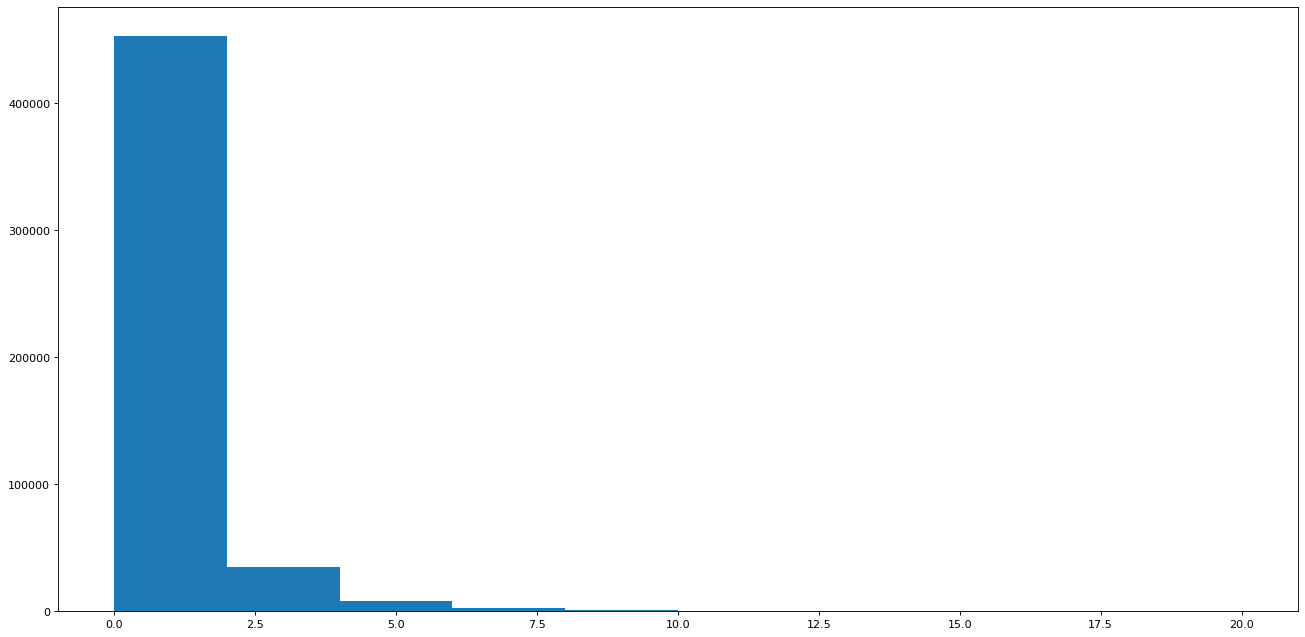

In [7]:
print(ss.describe(data_numeric))
fig = plt.figure(figsize=(20, 10), dpi=80)
plt.hist(data_numeric);

## Initialize markov chain

In [10]:
chain = mc.MarkovChain().from_data(data_numeric)

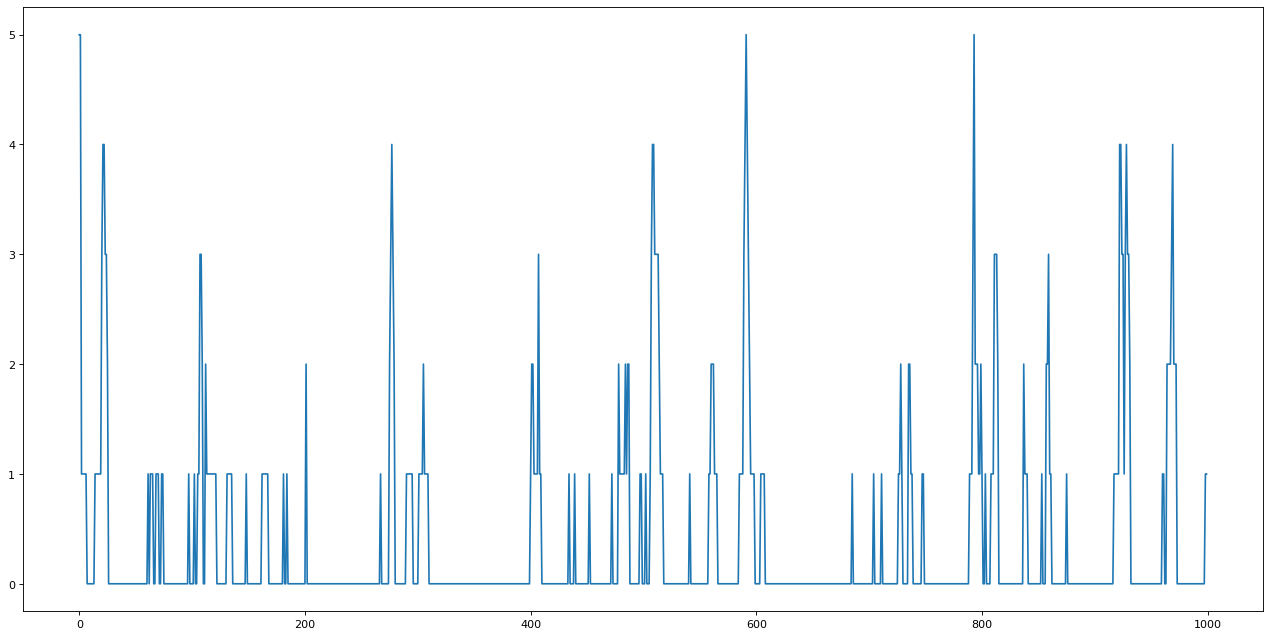

In [11]:
fig = plt.figure(figsize=(20, 10), dpi=80)
plt.plot(chain.simulate(n=1000, start=5, ret="states"))

In [15]:
import random
data_test = np.random.randint(0,21, 100)

In [20]:
np.append(data_test, range(21))

array([14,  4,  9, 20, 15,  5,  2,  4,  7, 18, 10,  2,  7,  1, 17,  9, 12,
       17, 18, 14,  2,  3,  0,  0, 18, 13, 12, 11, 10, 17,  0,  0,  3,  6,
       20, 15,  0, 17, 16,  4,  6,  8,  5, 12,  1, 20, 18, 15,  4, 18,  4,
       12, 15, 20, 20,  8,  7, 10, 16,  7,  6, 16,  8,  0,  8, 11,  9, 18,
       18,  9,  9, 10,  8, 20, 14, 20,  9,  2, 11,  2, 14,  9, 12, 10,  7,
       18,  2,  9, 12, 15,  1,  9, 12, 19,  5, 11,  1, 15, 12, 11,  0,  1,
        2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [16]:
chain = mc.MarkovChain().from_data(data_test)

In [17]:
len(chain.observed_p_matrix)

21